<a href="https://colab.research.google.com/github/AlinaStudyPM/UniversityML/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [91]:
data = pd.read_csv('FLATS_FOR_11_PREZ.csv', encoding='utf-8', delimiter=';', index_col=0)
data

,SQUARE_METERS,METRO_DISTANCE,PRICE
Id,,,
601,28,677,7328400
602,54,120,9754600
603,43,1344,6781500
604,33,1003,6784100
605,30,591,7296200
...,...,...,...
696,28,2073,4826700
697,63,2120,6800800
698,33,1411,6517500


In [92]:
X1 = data[['SQUARE_METERS']]
Y1 = data['PRICE']

In [93]:
X2 = data[['METRO_DISTANCE']]
Y2 = data['PRICE']

In [94]:
X3 = data[['SQUARE_METERS', 'METRO_DISTANCE']]
Y3 = data['PRICE']

In [95]:
model1 = LinearRegression()
model1.fit(X1, Y1)

LinearRegression()

In [96]:
model2 = LinearRegression()
model2.fit(X2, Y2)

LinearRegression()

In [97]:
model3 = LinearRegression()
model3.fit(X3, Y3)

LinearRegression()

In [101]:
X1_pred = np.linspace(X1.min(), X1.max(), 100).reshape(-1, 1)
Y1_pred = model1.predict(X1_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [104]:
X2_pred = np.linspace(X2.min(), X2.max(), 100).reshape(-1, 1)
Y2_pred = model2.predict(X2_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


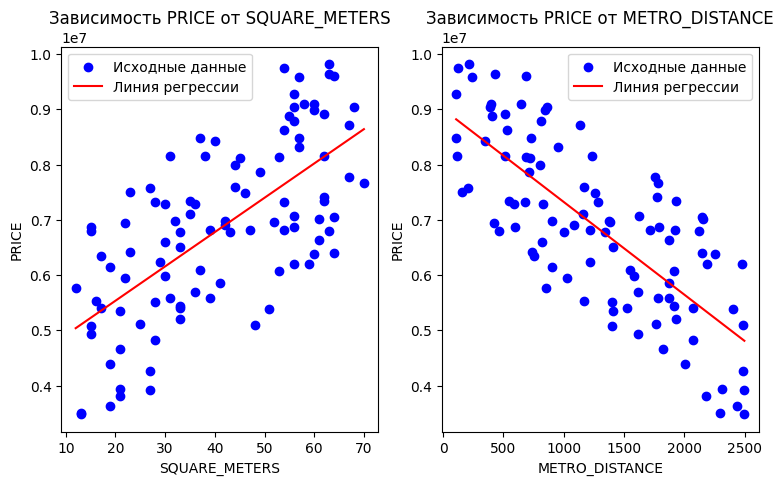

In [105]:
fig1 = plt.figure(figsize=(9, 5))

plt.subplot(1, 2, 1)
plt.scatter(X1, Y1, color='b', label="Исходные данные")
plt.plot(X1_pred, Y1_pred, color='r', label='Линия регрессии')
plt.title("Зависимость PRICE от SQUARE_METERS")
plt.xlabel('SQUARE_METERS')
plt.ylabel('PRICE')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X2, Y2, color='b', label="Исходные данные")
plt.plot(X2_pred, Y2_pred, color='r', label='Линия регрессии')
plt.title("Зависимость PRICE от METRO_DISTANCE")
plt.xlabel('METRO_DISTANCE')
plt.ylabel('PRICE')
plt.legend()

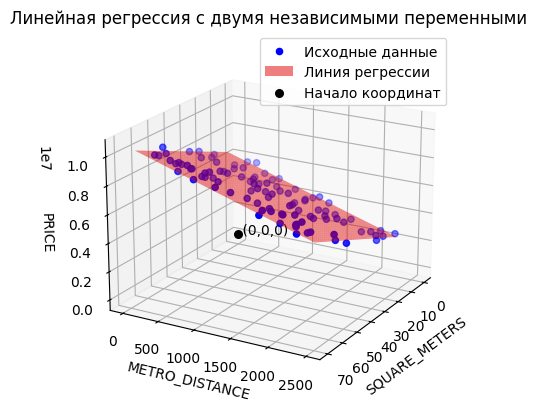

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y3, color='b', label='Исходные данные')


X1_range = np.linspace(data['SQUARE_METERS'].min(), data['SQUARE_METERS'].max(), 100)
X2_range = np.linspace(data['METRO_DISTANCE'].min(), data['METRO_DISTANCE'].max(), 100)
X1_grid, X2_grid = np.meshgrid(X1_range, X2_range)

Y_grid = model3.intercept_ + model3.coef_[0] * X1_grid + model3.coef_[1] * X2_grid

ax.plot_surface(X1_grid, X2_grid, Y_grid, color='r', alpha=0.5, label='Линия регрессии')

ax.view_init(elev=20, azim=30)

ax.scatter(0, 0, 0, color='k', s=30, label='Начало координат')
ax.text(0, 0, 0, " (0,0,0)", color='k')



ax.set_xlabel('SQUARE_METERS')
ax.set_ylabel('METRO_DISTANCE')
ax.set_zlabel('PRICE')
ax.set_title('Линейная регрессия с двумя независимыми переменными')

plt.legend()
plt.show()

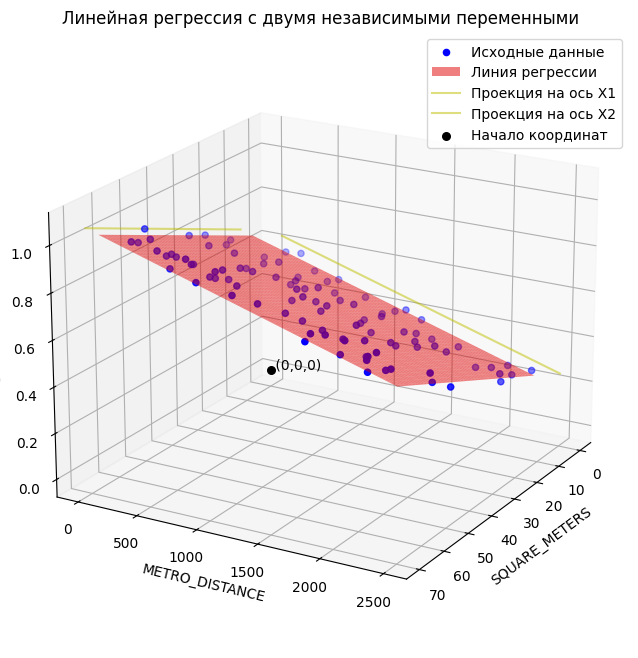

In [108]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Исходные данные, замените X1, X2, Y3 на ваши соответствующие массивы
ax.scatter(X1, X2, Y3, color='b', label='Исходные данные')

# Создание сетки для предсказаний
X1_range = np.linspace(data['SQUARE_METERS'].min(), data['SQUARE_METERS'].max(), 100)
X2_range = np.linspace(data['METRO_DISTANCE'].min(), data['METRO_DISTANCE'].max(), 100)
X1_grid, X2_grid = np.meshgrid(X1_range, X2_range)

Y_grid = model3.intercept_ + model3.coef_[0] * X1_grid + model3.coef_[1] * X2_grid

# Линия регрессии
ax.plot_surface(X1_grid, X2_grid, Y_grid, color='r', alpha=0.5, label='Линия регрессии')

# Проекции на оси
# Проекция на ось X1 (SQUARE_METERS)
ax.plot(X1_range, np.zeros_like(X1_range), model3.intercept_ + model3.coef_[0] * X1_range, color='y', alpha=0.5, label='Проекция на ось X1')

# Проекция на ось X2 (METRO_DISTANCE)
ax.plot(np.zeros_like(X2_range), X2_range, model3.intercept_ + model3.coef_[1] * X2_range, color='y', alpha=0.5, label='Проекция на ось X2')

# Настройка вида
ax.view_init(elev=20, azim=30)

# Обозначение начала координат
ax.scatter(0, 0, 0, color='k', s=30, label='Начало координат')
ax.text(0, 0, 0, " (0,0,0)", color='k')

# Подписи осей
ax.set_xlabel('SQUARE_METERS')
ax.set_ylabel('METRO_DISTANCE')
ax.set_zlabel('PRICE')
ax.set_title('Линейная регрессия с двумя независимыми переменными')

plt.legend()
plt.show()

In [109]:
quadratic = PolynomialFeatures(degree=2)
X1_quad = quadratic.fit_transform(X1)

model4 = LinearRegression()
model4.fit(X1_quad, Y1)

LinearRegression()

In [110]:
quadratic = PolynomialFeatures(degree=2)
X2_quad = quadratic.fit_transform(X2)

model5 = LinearRegression()
model5.fit(X2_quad, Y2)

LinearRegression()

In [114]:
X4_pred = np.linspace(X1.min(), X1.max(), 100).reshape(-1, 1)
X4_quad_pred = quadratic.fit_transform(X4_pred)
Y4_pred = model4.predict(X4_quad_pred)

In [115]:
X5_pred = np.linspace(X2.min(), X2.max(), 100).reshape(-1, 1)
X5_quad_pred = quadratic.fit_transform(X5_pred)
Y5_pred = model5.predict(X5_quad_pred)

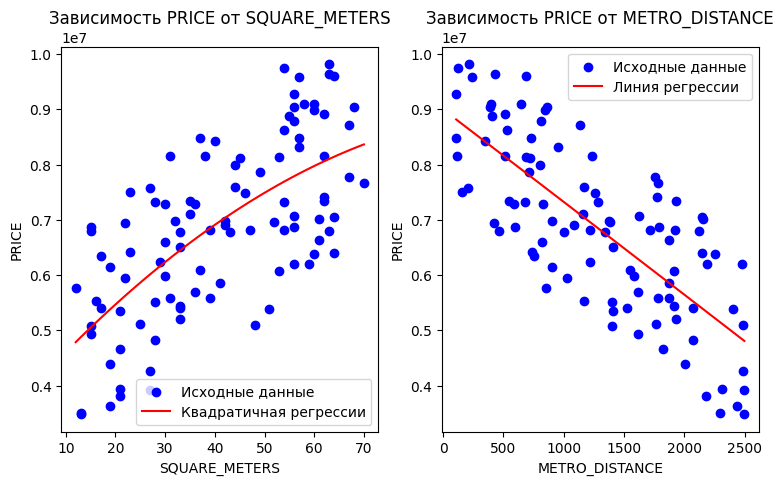

In [122]:
fig4 = plt.figure(figsize=(9, 5))

plt.subplot(1, 2, 1)
plt.scatter(X1, Y1, color='b', label="Исходные данные")
plt.plot(X4_pred, Y4_pred, color='r', label='Квадратичная регрессии')
plt.title("Зависимость PRICE от SQUARE_METERS")
plt.xlabel('SQUARE_METERS')
plt.ylabel('PRICE')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X2, Y2, color='b', label="Исходные данные")
plt.plot(X5_pred, Y5_pred, color='r', label='Линия регрессии')
plt.title("Зависимость PRICE от METRO_DISTANCE")
plt.xlabel('METRO_DISTANCE')
plt.ylabel('PRICE')
plt.legend()

In [120]:
intercept = model4.intercept_
coefficients = model4.coef_

# Формирование уравнения
equation = f'Y = {intercept:.2f} + {coefficients[1]:.2f}*X + {coefficients[2]:.2f}*X^2'
print(equation)

Y = 3648775.12 + 100377.16*X + -471.04*X^2


In [121]:
intercept = model5.intercept_
coefficients = model5.coef_

# Формирование уравнения
equation = f'Y = {intercept:.2f} + {coefficients[1]:.2f}*X + {coefficients[2]:.2f}*X^2'
print(equation)

Y = 8999498.75 + -1671.12*X + -0.00*X^2
